<a href="https://colab.research.google.com/github/tgwon/ai4ml/blob/main/project/EDA_Preprocessing_FeatureEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# drive mount
# 라이브러리 설치 및 seed 설정.

from google.colab import drive
drive.mount('/content/drive')

import os
import random
import numpy as np
from sklearn.metrics import mean_squared_error, mean_squared_log_error

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import f_oneway

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42)

Mounted at /content/drive


In [ ]:
# 경고 무시 설정
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

## RMSLE (Root Mean Squared Log Error) -> 과대추정보다는 과소추정을 조심하자

In [ ]:
y_true = [60, 80, 90]
y_pred = [67, 78, 91]
RMSE = np.sqrt(mean_squared_error(y_true, y_pred))
RMSLE = np.sqrt(mean_squared_log_error(y_true, y_pred))
print('RMSE :', RMSE)
print('RMSLE :', RMSLE)

RMSE : 4.242640687119285
RMSLE : 0.0646679237996832


In [ ]:
# RMSLE 는 RMSE에 비해 이상치에 강건함.

y_true = [60, 80, 800]
y_pred = [67, 78, 91]
RMSE = np.sqrt(mean_squared_error(y_true, y_pred))
RMSLE = np.sqrt(mean_squared_log_error(y_true, y_pred))
print('RMSE :', RMSE)
print('RMSLE :', RMSLE)

RMSE : 409.3629196690878
RMSLE : 1.2510842762984995


In [ ]:
y_true = [100]
y_pred = [60]
RMSE = np.sqrt(mean_squared_error(y_true, y_pred))
RMSLE = np.sqrt(mean_squared_log_error(y_true, y_pred))
print('RMSE :', RMSE)
print('RMSLE :', RMSLE)

RMSE : 40.0
RMSLE : 0.5042466526679483


In [ ]:
# RMSLE 는 Under Estimation에 더 큰 패널티를 부여함.

y_true = [100]
y_pred = [140]
RMSE = np.sqrt(mean_squared_error(y_true, y_pred))
RMSLE = np.sqrt(mean_squared_log_error(y_true, y_pred))
print('RMSE :', RMSE)
print('RMSLE :', RMSLE)

RMSE : 40.0
RMSLE : 0.33363937353690876


# Train data EDA

In [2]:
train_df = pd.read_csv('drive/MyDrive/ai4ml/open/train.csv')
test_df = pd.read_csv('drive/MyDrive/ai4ml/open/test.csv')

In [3]:
train_df.head()

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3


In [35]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39581 entries, 0 to 39608
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           39581 non-null  object
 1   사고일시         39581 non-null  object
 2   요일           39581 non-null  object
 3   기상상태         39581 non-null  object
 4   시군구          39581 non-null  object
 5   도로형태         39581 non-null  object
 6   노면상태         39581 non-null  object
 7   사고유형         39581 non-null  object
 8   사고유형 - 세부분류  39581 non-null  object
 9   법규위반         39581 non-null  object
 10  가해운전자 차종     39581 non-null  object
 11  가해운전자 성별     39581 non-null  object
 12  가해운전자 연령     39581 non-null  object
 13  가해운전자 상해정도   39581 non-null  object
 14  피해운전자 차종     38598 non-null  object
 15  피해운전자 성별     38598 non-null  object
 16  피해운전자 연령     38598 non-null  object
 17  피해운전자 상해정도   38598 non-null  object
 18  사망자수         39581 non-null  int64 
 19  중상자수         39581 non-nu

In [36]:
train_df.isnull().sum()

ID               0
사고일시             0
요일               0
기상상태             0
시군구              0
도로형태             0
노면상태             0
사고유형             0
사고유형 - 세부분류      0
법규위반             0
가해운전자 차종         0
가해운전자 성별         0
가해운전자 연령         0
가해운전자 상해정도       0
피해운전자 차종       983
피해운전자 성별       983
피해운전자 연령       983
피해운전자 상해정도     983
사망자수             0
중상자수             0
경상자수             0
부상자수             0
ECLO             0
dtype: int64

In [43]:
train_df.nunique()

ID             39581
사고일시           18047
요일                 7
기상상태               6
시군구              192
도로형태              11
노면상태               6
사고유형               3
사고유형 - 세부분류       14
법규위반              11
가해운전자 차종          12
가해운전자 성별           3
가해운전자 연령          89
가해운전자 상해정도         6
피해운전자 차종          13
피해운전자 성별           3
피해운전자 연령          97
피해운전자 상해정도         6
사망자수               3
중상자수               7
경상자수              18
부상자수               9
ECLO              46
dtype: int64

## 시군구
- test data 에 존재하지 않는 시군구 데이터 삭제 (28개)
- 시군구 별 평균 ECLO를 봤을 때 눈에 띄게 평균 ECLO 가 높거나 낮은 시군구들 발견
    - 과소추정에 더 민감해야하기 때문에 높은 시군구들에 주목
    - 직접 확인 해보니, 대형사고가 발생 + 적은 데이터 때문이었음
- 시군구 별 사고 발생 횟수 확인
    - 시군구 별 평균 ECLO와 음의 상관관계 ( -0.165 )



In [4]:
train_df.시군구.value_counts()

대구광역시 남구 대명동      1749
대구광역시 수성구 범어동     1173
대구광역시 달서구 상인동     1143
대구광역시 서구 비산동       968
대구광역시 서구 내당동       938
                  ... 
대구광역시 중구 도원동         2
대구광역시 동구 신용동         2
대구광역시 중구 동성로1가       2
대구광역시 북구 도남동         2
대구광역시 동구 평광동         1
Name: 시군구, Length: 199, dtype: int64

In [5]:
# 시군구의 빈도 계산
count_by_sigungu = train_df['시군구'].value_counts()

# 빈도가 30 이상인 시군구 선택
selected_sigungu = count_by_sigungu[count_by_sigungu >= 30].index

# 선택된 시군구에 해당하는 데이터 추출
selected_data = train_df[train_df['시군구'].isin(selected_sigungu)]

In [6]:
groups = [selected_data['ECLO'][selected_data['시군구'] == group] for group in selected_data['시군구'].unique()]

# ANOVA 검정
f_statistic, p_value = f_oneway(*groups)

# 결과 출력
print(f'ANOVA 검정 통계량: {f_statistic}')
print(f'p-value: {p_value}')

# 유의수준 0.05에서의 검정
alpha = 0.05
if p_value < alpha:
    print('시군구에 따라 ECLO 값이 유의미하게 차이납니다.')
else:
    print('시군구에 따라 ECLO 값에는 유의미한 차이가 없습니다.')

ANOVA 검정 통계량: 3.2313806207660902
p-value: 7.5323720103188455e-34
시군구에 따라 ECLO 값이 유의미하게 차이납니다.


In [7]:
# 시군구별로 ECLO 값 분리
groups = [train_df['ECLO'][train_df['시군구'] == group] for group in train_df['시군구'].unique()]

# ANOVA 검정
f_statistic, p_value = f_oneway(*groups)

# 결과 출력
print(f'ANOVA 검정 통계량: {f_statistic}')
print(f'p-value: {p_value}')

# 유의수준 0.05에서의 검정
alpha = 0.05
if p_value < alpha:
    print('시군구에 따라 ECLO 값이 유의미하게 차이납니다.')
else:
    print('시군구에 따라 ECLO 값에는 유의미한 차이가 없습니다.')

ANOVA 검정 통계량: 3.219823035824224
p-value: 4.157622250234453e-47
시군구에 따라 ECLO 값이 유의미하게 차이납니다.


In [9]:
train_df.shape

(39609, 23)

In [10]:
# train_df에서 test_df에 존재하지 않는 시군구 값 제거
train_df = train_df[train_df['시군구'].isin(test_df['시군구'])]

In [11]:
train_df.shape

(39581, 23)

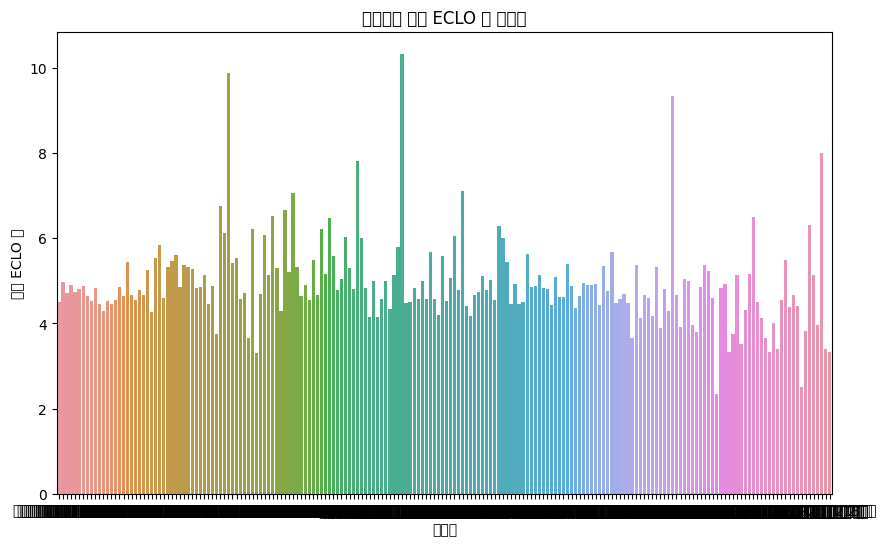

In [22]:
# 중복된 시군구 값들을 평균내어 새로운 데이터프레임 생성
df_avg = train_df.groupby('시군구')['ECLO'].mean().reset_index()

# 시군구별 ECLO 값을 막대 그래프로 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='시군구', y='ECLO', data=df_avg)
plt.title('시군구별 평균 ECLO 값 시각화')
plt.xlabel('시군구')
plt.ylabel('평균 ECLO 값')
plt.show()

In [25]:
[df_avg.ECLO > 7.8]

,시군구,ECLO
42,대구광역시 동구 덕곡동,9.875000
74,대구광역시 동구 진인동,7.823529
85,대구광역시 북구 노곡동,10.333333
152,대구광역시 중구 대안동,9.333333
189,대구광역시 중구 하서동,8.000000


In [24]:
# 'ECLO' 열의 평균과 표준편차 계산
mean_value = df_avg['ECLO'].mean()
std_dev = df_avg['ECLO'].std()

# 3시그마 밖의 값을 찾기
lower_bound = mean_value - 3 * std_dev
upper_bound = mean_value + 3 * std_dev

outliers = df_avg[(df_avg['ECLO'] < lower_bound) | (df_avg['ECLO'] > upper_bound)]

# 결과 출력
print("3시그마 밖의 값:")
print(outliers)

3시그마 밖의 값:
              시군구       ECLO
42   대구광역시 동구 덕곡동   9.875000
85   대구광역시 북구 노곡동  10.333333
152  대구광역시 중구 대안동   9.333333
189  대구광역시 중구 하서동   8.000000


In [31]:
train_df.ECLO.describe()

count    39581.000000
mean         4.725803
std          3.206176
min          1.000000
25%          3.000000
50%          3.000000
75%          6.000000
max         74.000000
Name: ECLO, dtype: float64

In [33]:
train_df[train_df.시군구 == '대구광역시 동구 덕곡동']

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
3140,ACCIDENT_03140,2019-03-30 09,토요일,맑음,대구광역시 동구 덕곡동,교차로 - 교차로안,건조,차대차,측면충돌,교차로운행방법위반,...,상해없음,승용,남,41세,경상,0,0,3,0,9
3739,ACCIDENT_03739,2019-04-15 01,월요일,맑음,대구광역시 동구 덕곡동,교차로 - 교차로안,건조,차량단독,공작물충돌,안전운전불이행,...,사망,NaN,NaN,NaN,NaN,2,0,0,0,20
4902,ACCIDENT_04902,2019-05-12 12,일요일,맑음,대구광역시 동구 덕곡동,단일로 - 기타,건조,차대차,측면충돌,안전거리미확보,...,상해없음,승용,남,46세,경상,0,0,3,0,9
5138,ACCIDENT_05138,2019-05-18 16,토요일,맑음,대구광역시 동구 덕곡동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승합,남,57세,경상,0,0,4,0,12
17905,ACCIDENT_17905,2020-04-19 19,일요일,비,대구광역시 동구 덕곡동,단일로 - 기타,젖음/습기,차대차,추돌,안전운전불이행,...,상해없음,승용,여,39세,경상,0,2,2,0,16
22010,ACCIDENT_22010,2020-08-08 17,토요일,맑음,대구광역시 동구 덕곡동,단일로 - 기타,건조,차대차,측면충돌,차로위반,...,부상신고,승용,남,31세,경상,0,0,1,1,4
32068,ACCIDENT_32068,2021-05-19 11,수요일,맑음,대구광역시 동구 덕곡동,단일로 - 기타,건조,차대차,측면충돌,안전거리미확보,...,상해없음,승용,남,30세,경상,0,0,2,0,6
32199,ACCIDENT_32199,2021-05-23 18,일요일,맑음,대구광역시 동구 덕곡동,단일로 - 기타,건조,차대차,측면충돌,안전운전불이행,...,상해없음,원동기,남,34세,경상,0,0,1,0,3


In [30]:
train_df[train_df.시군구 == '대구광역시 북구 노곡동']

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
2611,ACCIDENT_02611,2019-03-17 13,일요일,맑음,대구광역시 북구 노곡동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,여,36세,경상,0,0,1,0,3
3365,ACCIDENT_03365,2019-04-05 13,금요일,맑음,대구광역시 북구 노곡동,단일로 - 기타,건조,차대차,기타,안전거리미확보,...,상해없음,승용,남,58세,경상,0,0,4,0,12
4522,ACCIDENT_04522,2019-05-03 07,금요일,맑음,대구광역시 북구 노곡동,단일로 - 기타,건조,차대차,추돌,안전거리미확보,...,상해없음,승용,남,57세,경상,0,0,1,0,3
4975,ACCIDENT_04975,2019-05-14 15,화요일,맑음,대구광역시 북구 노곡동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,71세,중상,0,5,2,0,31
8281,ACCIDENT_08281,2019-08-05 17,월요일,맑음,대구광역시 북구 노곡동,단일로 - 기타,건조,차대사람,기타,안전운전불이행,...,상해없음,보행자,여,20세,경상,0,0,1,0,3
9799,ACCIDENT_09799,2019-09-13 08,금요일,맑음,대구광역시 북구 노곡동,단일로 - 기타,건조,차대차,추돌,안전거리미확보,...,상해없음,승용,남,48세,경상,0,0,2,0,6
10040,ACCIDENT_10040,2019-09-19 14,목요일,맑음,대구광역시 북구 노곡동,교차로 - 교차로횡단보도내,건조,차대차,측면충돌,안전운전불이행,...,중상,승용,남,53세,상해없음,0,1,0,0,5
13208,ACCIDENT_13208,2019-11-29 18,금요일,맑음,대구광역시 북구 노곡동,단일로 - 기타,건조,차대차,측면충돌,안전운전불이행,...,경상,화물,남,67세,경상,0,0,3,0,9
14202,ACCIDENT_14202,2019-12-23 20,월요일,맑음,대구광역시 북구 노곡동,단일로 - 교량,건조,차대차,추돌,안전운전불이행,...,사망,화물,남,31세,경상,1,0,1,0,13
17791,ACCIDENT_17791,2020-04-15 15,수요일,맑음,대구광역시 북구 노곡동,교차로 - 교차로안,건조,차대차,측면충돌,기타,...,경상,승용,남,38세,경상,0,0,2,0,6


In [34]:
train_df[train_df.시군구 =='대구광역시 중구 대안동']

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
15381,ACCIDENT_15381,2020-01-23 17,목요일,맑음,대구광역시 중구 대안동,교차로 - 교차로안,건조,차대차,측면충돌,안전운전불이행,...,상해없음,승용,남,24세,경상,0,0,3,0,9
23791,ACCIDENT_23791,2020-09-23 17,수요일,맑음,대구광역시 중구 대안동,교차로 - 교차로안,건조,차대차,측면충돌,교차로운행방법위반,...,상해없음,승용,남,39세,경상,0,0,2,0,6
33549,ACCIDENT_33549,2021-07-02 18,금요일,맑음,대구광역시 중구 대안동,교차로 - 교차로부근,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,35세,경상,0,0,4,1,13


In [51]:
train_df[train_df.시군구 =='대구광역시 중구 하서동']

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
8589,ACCIDENT_08589,2019-08-13 12,화요일,맑음,대구광역시 중구 하서동,단일로 - 기타,건조,차대차,기타,안전운전불이행,...,상해없음,이륜,남,16세,부상신고,0,0,0,2,2
9744,ACCIDENT_09744,2019-09-11 18,수요일,맑음,대구광역시 중구 하서동,교차로 - 교차로부근,건조,차대차,측면충돌,안전운전불이행,...,상해없음,승용,남,49세,경상,0,2,7,6,37
15708,ACCIDENT_15708,2020-02-03 11,월요일,맑음,대구광역시 중구 하서동,단일로 - 기타,건조,차대차,측면충돌,안전운전불이행,...,부상신고,승용,여,23세,경상,0,0,1,1,4
18756,ACCIDENT_18756,2020-05-14 08,목요일,맑음,대구광역시 중구 하서동,단일로 - 기타,건조,차대차,기타,안전운전불이행,...,부상신고,승용,여,49세,상해없음,0,0,0,1,1
21048,ACCIDENT_21048,2020-07-13 04,월요일,맑음,대구광역시 중구 하서동,교차로 - 교차로안,건조,차대차,측면충돌,교차로운행방법위반,...,상해없음,승용,남,66세,경상,0,0,1,0,3
21412,ACCIDENT_21412,2020-07-23 00,목요일,비,대구광역시 중구 하서동,교차로 - 교차로부근,젖음/습기,차대차,측면충돌,신호위반,...,상해없음,승용,남,23세,부상신고,0,0,4,2,14
21510,ACCIDENT_21510,2020-07-25 01,토요일,비,대구광역시 중구 하서동,교차로 - 교차로부근,젖음/습기,차대차,정면충돌,중앙선침범,...,상해없음,승용,남,29세,중상,0,1,1,1,9
23077,ACCIDENT_23077,2020-09-06 00,일요일,맑음,대구광역시 중구 하서동,교차로 - 교차로부근,건조,차대차,추돌,안전운전불이행,...,상해없음,이륜,남,21세,경상,0,0,1,0,3
23191,ACCIDENT_23191,2020-09-08 22,화요일,맑음,대구광역시 중구 하서동,단일로 - 기타,건조,차대차,측면충돌,안전운전불이행,...,상해없음,승용,여,20세,경상,0,0,2,0,6
37437,ACCIDENT_37437,2021-10-29 13,금요일,맑음,대구광역시 중구 하서동,교차로 - 교차로횡단보도내,건조,차대차,기타,안전운전불이행,...,상해없음,자전거,남,66세,부상신고,0,0,0,1,1


In [52]:
train_df[train_df.시군구 =='대구광역시 동구 진인동']

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
2615,ACCIDENT_02615,2019-03-17 14,일요일,맑음,대구광역시 동구 진인동,교차로 - 교차로부근,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,여,58세,경상,0,0,3,0,9
4417,ACCIDENT_04417,2019-04-30 09,화요일,맑음,대구광역시 동구 진인동,교차로 - 교차로안,건조,차대차,측면충돌,신호위반,...,부상신고,승용,남,70세,중상,0,1,0,1,6
5920,ACCIDENT_05920,2019-06-05 15,수요일,맑음,대구광역시 동구 진인동,단일로 - 기타,건조,차대차,정면충돌,안전운전불이행,...,상해없음,화물,남,30세,경상,0,0,2,0,6
6628,ACCIDENT_06628,2019-06-22 15,토요일,맑음,대구광역시 동구 진인동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,여,25세,중상,0,4,2,0,26
7566,ACCIDENT_07566,2019-07-17 12,수요일,맑음,대구광역시 동구 진인동,교차로 - 교차로안,건조,차량단독,공작물충돌,안전운전불이행,...,부상신고,NaN,NaN,NaN,NaN,0,0,0,1,1
8273,ACCIDENT_08273,2019-08-05 16,월요일,맑음,대구광역시 동구 진인동,단일로 - 기타,건조,차대차,정면충돌,중앙선침범,...,사망,승용,여,54세,중상,2,2,0,0,30
9015,ACCIDENT_09015,2019-08-24 12,토요일,맑음,대구광역시 동구 진인동,단일로 - 기타,건조,차량단독,기타,안전운전불이행,...,경상,NaN,NaN,NaN,NaN,0,0,1,0,3
13366,ACCIDENT_13366,2019-12-03 13,화요일,맑음,대구광역시 동구 진인동,단일로 - 기타,건조,차대차,후진중충돌,중앙선침범,...,상해없음,승용,남,63세,중상,0,2,0,0,10
18216,ACCIDENT_18216,2020-04-28 21,화요일,맑음,대구광역시 동구 진인동,단일로 - 기타,건조,차량단독,전도전복 - 전도,안전운전불이행,...,부상신고,NaN,NaN,NaN,NaN,0,0,0,1,1
18397,ACCIDENT_18397,2020-05-04 11,월요일,맑음,대구광역시 동구 진인동,교차로 - 교차로부근,건조,차대차,추돌,안전거리미확보,...,부상신고,승합,남,61세,경상,0,0,1,1,4


In [58]:
len(test_df[test_df.시군구 == '대구광역시 동구 진인동'])

3

In [59]:
len(test_df[test_df.시군구 =='대구광역시 중구 하서동'])

3

In [60]:
len(test_df[test_df.시군구 =='대구광역시 중구 대안동'])

1

In [42]:
df_avg

,시군구,ID
0,대구광역시 남구 대명동,1749
1,대구광역시 남구 봉덕동,625
2,대구광역시 남구 이천동,185
3,대구광역시 달서구 갈산동,110
4,대구광역시 달서구 감삼동,678
...,...,...
187,대구광역시 중구 태평로3가,40
188,대구광역시 중구 포정동,26
189,대구광역시 중구 하서동,10
190,대구광역시 중구 향촌동,5


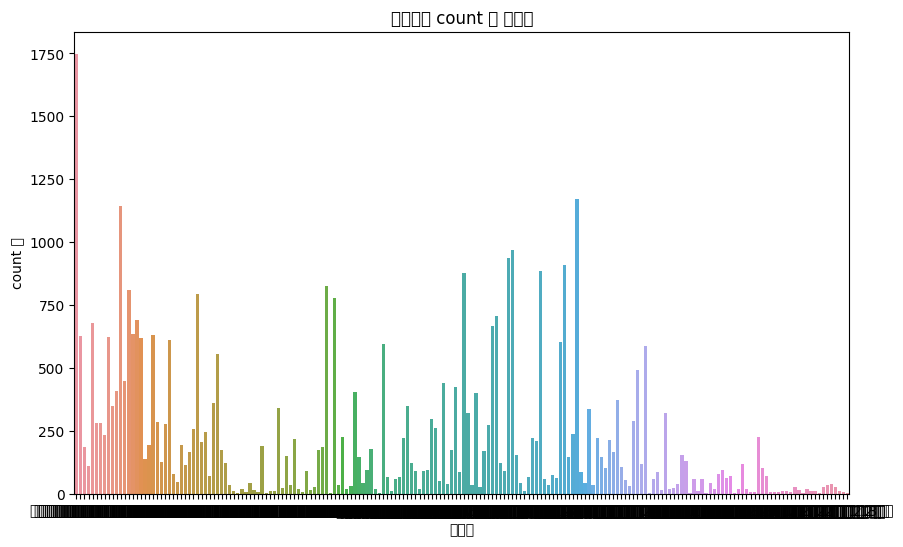

In [53]:
df_avg = train_df.groupby('시군구')['ID'].count().reset_index()

# 시군구별 사고 count 값을 막대 그래프로 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='시군구', y='ID', data=df_avg)
plt.title('시군구별 count 값 시각화')
plt.xlabel('시군구')
plt.ylabel('count 값')
plt.show()

In [54]:
df_avg.describe()

,ID
count,192.000000
mean,206.151042
std,274.534376
min,1.000000
25%,24.500000
50%,93.000000
75%,263.000000
max,1749.000000


In [46]:
df_avg[df_avg.ID > 1000]

,시군구,ID
0,대구광역시 남구 대명동,1749
11,대구광역시 달서구 상인동,1143
124,대구광역시 수성구 범어동,1173


In [47]:
df1 = train_df.groupby('시군구')['ECLO'].mean().reset_index()
df2 = train_df.groupby('시군구')['ID'].count().reset_index()

# '시군구' 컬럼을 기준으로 데이터프레임 병합
merged_df = pd.merge(df1, df2, on='시군구', how='inner')

In [48]:
merged_df

,시군구,ECLO,ID
0,대구광역시 남구 대명동,4.492281,1749
1,대구광역시 남구 봉덕동,4.968000,625
2,대구광역시 남구 이천동,4.702703,185
3,대구광역시 달서구 갈산동,4.909091,110
4,대구광역시 달서구 감삼동,4.738938,678
...,...,...,...
187,대구광역시 중구 태평로3가,5.125000,40
188,대구광역시 중구 포정동,3.961538,26
189,대구광역시 중구 하서동,8.000000,10
190,대구광역시 중구 향촌동,3.400000,5


In [50]:
# 두 변수(ECLO와 ID) 간의 상관관계 파악
correlation_matrix = merged_df[['ECLO', 'ID']].corr()

# 상관계수 출력
print(correlation_matrix)

          ECLO        ID
ECLO  1.000000 -0.165565
ID   -0.165565  1.000000


## 기상상태

In [ ]:
test_df.nunique()

ID      10963
사고일시     5548
요일          7
기상상태        5
시군구       192
도로형태       11
노면상태        6
사고유형        3
dtype: int64

In [ ]:
train_df.기상상태.unique()

array(['맑음', '흐림', '기타', '비', '안개', '눈'], dtype=object)

In [ ]:
train_df.기상상태.value_counts()

맑음    36181
비      2627
흐림      729
기타       56
안개        8
눈         8
Name: 기상상태, dtype: int64

In [ ]:
train_df[train_df.기상상태 == '안개']

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
2350,ACCIDENT_02350,2019-03-11 05,월요일,안개,대구광역시 서구 비산동,교차로 - 교차로안,젖음/습기,차대차,측면충돌,신호위반,...,상해없음,승용,남,66세,경상,0,0,2,0,6
6586,ACCIDENT_06586,2019-06-21 20,금요일,안개,대구광역시 수성구 신매동,단일로 - 기타,젖음/습기,차대차,추돌,안전거리미확보,...,경상,승용,남,64세,상해없음,0,0,2,0,6
13174,ACCIDENT_13174,2019-11-29 08,금요일,안개,대구광역시 동구 신기동,교차로 - 교차로안,기타,차대차,정면충돌,신호위반,...,상해없음,승용,남,68세,경상,0,0,2,0,6
16714,ACCIDENT_16714,2020-03-08 09,일요일,안개,대구광역시 동구 금강동,단일로 - 기타,기타,차대차,측면충돌,안전운전불이행,...,상해없음,자전거,여,68세,경상,0,0,1,0,3
27322,ACCIDENT_27322,2020-12-28 05,월요일,안개,대구광역시 북구 서변동,단일로 - 교량,젖음/습기,차대차,정면충돌,중앙선침범,...,상해없음,승용,남,49세,경상,0,0,1,0,3
27324,ACCIDENT_27324,2020-12-28 07,월요일,안개,대구광역시 달성군 논공읍,교차로 - 교차로안,젖음/습기,차대차,기타,신호위반,...,상해없음,이륜,남,20세,경상,0,0,1,0,3
27325,ACCIDENT_27325,2020-12-28 07,월요일,안개,대구광역시 달서구 죽전동,단일로 - 기타,젖음/습기,차대차,기타,안전거리미확보,...,상해없음,승용,남,42세,상해없음,0,1,2,0,11
27363,ACCIDENT_27363,2020-12-29 07,화요일,안개,대구광역시 달성군 구지면,단일로 - 기타,서리/결빙,차대차,기타,안전운전불이행,...,상해없음,승용,남,60세,경상,0,0,2,0,6


In [ ]:
train_df[train_df.기상상태 == '눈']

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
27381,ACCIDENT_27381,2020-12-29 20,화요일,눈,대구광역시 수성구 만촌동,단일로 - 기타,젖음/습기,차대사람,횡단중,신호위반,...,경상,보행자,여,28세,중상,0,1,1,0,8
27389,ACCIDENT_27389,2020-12-30 00,수요일,눈,대구광역시 북구 산격동,교차로 - 교차로횡단보도내,젖음/습기,차대차,측면충돌,교차로운행방법위반,...,상해없음,개인형이동수단(PM),남,34세,경상,0,0,1,0,3
27960,ACCIDENT_27960,2021-01-18 11,월요일,눈,대구광역시 동구 효목동,교차로 - 교차로안,젖음/습기,차대차,측면충돌,안전거리미확보,...,상해없음,승용,남,35세,경상,0,0,1,0,3
27962,ACCIDENT_27962,2021-01-18 12,월요일,눈,대구광역시 서구 비산동,교차로 - 교차로부근,젖음/습기,차대차,측면충돌,안전운전불이행,...,상해없음,이륜,여,71세,경상,0,0,1,0,3
28145,ACCIDENT_28145,2021-01-24 00,일요일,눈,대구광역시 동구 용수동,교차로 - 교차로횡단보도내,젖음/습기,차량단독,전도전복 - 전도,안전운전불이행,...,부상신고,NaN,NaN,NaN,NaN,0,0,0,1,1
28862,ACCIDENT_28862,2021-02-16 19,화요일,눈,대구광역시 북구 검단동,단일로 - 기타,젖음/습기,차대차,측면충돌,안전거리미확보,...,상해없음,승용,여,53세,경상,0,0,1,0,3
39196,ACCIDENT_39196,2021-12-19 02,일요일,눈,대구광역시 동구 도학동,단일로 - 기타,서리/결빙,차대차,측면충돌,안전거리미확보,...,상해없음,승용,남,23세,경상,0,0,2,0,6
39197,ACCIDENT_39197,2021-12-19 05,일요일,눈,대구광역시 동구 대림동,단일로 - 기타,젖음/습기,차량단독,기타,안전운전불이행,...,사망,NaN,NaN,NaN,NaN,1,0,0,0,10


In [ ]:
train_df[train_df.기상상태.str.contains('흐림|기타|안개|눈')].loc(['기상상태'])

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
7,ACCIDENT_00007,2019-01-01 06,화요일,흐림,대구광역시 달서구 상인동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,53세,경상,0,0,1,0,3
113,ACCIDENT_00113,2019-01-04 18,금요일,흐림,대구광역시 북구 읍내동,교차로 - 교차로부근,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,47세,부상신고,0,0,0,1,1
126,ACCIDENT_00126,2019-01-05 04,토요일,흐림,대구광역시 달서구 두류동,교차로 - 교차로안,건조,차대차,측면충돌,신호위반,...,상해없음,승용,남,64세,경상,0,0,1,0,3
185,ACCIDENT_00185,2019-01-06 23,일요일,기타,대구광역시 달서구 두류동,단일로 - 기타,건조,차대차,기타,안전운전불이행,...,상해없음,이륜,남,53세,중상,0,1,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39299,ACCIDENT_39299,2021-12-22 15,수요일,흐림,대구광역시 중구 문화동,교차로 - 교차로안,건조,차대사람,횡단중,안전운전불이행,...,기타불명,보행자,남,76세,중상,0,1,0,0,5
39379,ACCIDENT_39379,2021-12-24 18,금요일,흐림,대구광역시 중구 동산동,기타 - 기타,건조,차대차,측면충돌,안전거리미확보,...,경상,승용,여,48세,경상,0,0,2,0,6
39437,ACCIDENT_39437,2021-12-27 05,월요일,흐림,대구광역시 달서구 이곡동,기타 - 기타,건조,차량단독,기타,기타,...,경상,NaN,NaN,NaN,NaN,0,0,1,0,3
39473,ACCIDENT_39473,2021-12-27 23,월요일,흐림,대구광역시 중구 남산동,기타 - 기타,건조,차대차,측면충돌,안전거리미확보,...,상해없음,승용,남,21세,경상,0,0,1,0,3


In [ ]:
train_df.loc[train_df.기상상태.str.contains('흐림|기타|안개|눈'), '기상상태'] = '기타'

In [ ]:
train_df.기상상태.value_counts()

맑음    36154
비      2626
기타      801
Name: 기상상태, dtype: int64

In [ ]:
train_df.기상상태.unique()

array(['맑음', '기타', '비'], dtype=object)

In [ ]:
test_df.기상상태.value_counts()

맑음    10321
비       394
흐림      207
기타       31
눈        10
Name: 기상상태, dtype: int64

In [ ]:
test_df.loc[test_df.기상상태.str.contains('흐림|기타|눈'), '기상상태'] = '기타'

In [ ]:
test_df.기상상태.value_counts()

맑음    10321
비       394
기타      248
Name: 기상상태, dtype: int64

In [ ]:
train_df.head()

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,기타,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3


In [ ]:
test_df.head()

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
0,ACCIDENT_39609,2022-01-01 01,토요일,맑음,대구광역시 수성구 상동,교차로 - 교차로안,건조,차대사람
1,ACCIDENT_39610,2022-01-01 01,토요일,맑음,대구광역시 수성구 지산동,단일로 - 기타,건조,차대사람
2,ACCIDENT_39611,2022-01-01 04,토요일,맑음,대구광역시 수성구 수성동2가,교차로 - 교차로안,건조,차대차
3,ACCIDENT_39612,2022-01-01 04,토요일,맑음,대구광역시 수성구 신매동,단일로 - 기타,건조,차대차
4,ACCIDENT_39613,2022-01-01 06,토요일,맑음,대구광역시 달서구 감삼동,교차로 - 교차로안,건조,차대차


In [ ]:
# 시군구 -> 도시, 구, 동 으로 변환

# \S+ : 하나 이상의 공백이 아닌 문자
location_pattern = r'(\S+) (\S+) (\S+)'

train_df[['도시', '구', '동']] = train_df['시군구'].str.extract(location_pattern)
train_df = train_df.drop(columns=['시군구'])

test_df[['도시', '구', '동']] = test_df['시군구'].str.extract(location_pattern)
test_df = test_df.drop(columns=['시군구'])

In [ ]:
cctv = pd.read_csv('/content/drive/MyDrive/ai4ml/open/external_open/대구 CCTV 정보.csv',encoding='cp949')
cctv.head()

,무인교통단속카메라관리번호,시도명,시군구명,도로종류,도로노선번호,도로노선명,도로노선방향,소재지도로명주소,소재지지번주소,위도,경도,설치장소,단속구분,제한속도,단속구간위치구분,과속단속구간길이,보호구역구분,설치연도
0,주차12,대구광역시,남구,시도,NaN,대명로,3,대구광역시 남구 대명로 162,대구광역시 남구 대명동 903-13,35.838857,128.575418,안지랑네거리1 버스정류장,4,0,NaN,NaN,99.0,2010.0
1,주차13,대구광역시,남구,시도,NaN,봉덕로,3,대구광역시 남구 봉덕로 135,대구광역시 남구 봉덕동 853-8,35.844653,128.604619,효성백년가약,4,0,NaN,NaN,99.0,2013.0
2,주차14,대구광역시,남구,시도,NaN,대봉로,3,대구광역시 남구 봉덕로 134,대구광역시 남구 봉덕동 866-46,35.844183,128.604815,강변코오롱하늘채,4,0,NaN,NaN,99.0,2013.0
3,주차15,대구광역시,남구,시도,NaN,큰골길,3,대구광역시 남구 큰골길 200,대구광역시 남구 대명동 2680-17,35.834798,128.585284,보성청록타운,4,0,NaN,NaN,99.0,2014.0
4,주차16,대구광역시,남구,시도,NaN,큰골길,3,대구광역시 남구 큰골길 243,대구광역시 남구 봉덕동 1616,35.832728,128.588324,환경차고지,4,0,NaN,NaN,99.0,2014.0


In [ ]:
cctv['cctv설치개수'] = 1

location_pattern = r'(\S+) (\S+) (\S+) (\S+)'
cctv[['도시', '구', '동', '번지']] = cctv['소재지지번주소'].str.extract(location_pattern)
cctv = cctv[['cctv설치개수','도시','구','동']]

cctv = cctv.groupby([ '구', '동']).sum().reset_index()
cctv['도시'] = '대구광역시'
cctv.reset_index(inplace=True, drop=True)

cctv.head()

## countrywide_accident

In [ ]:
# 대구를 제외한 전국에서 발생한 교통사고 데이터
# train_data와 양식 동일
ca = pd.read_csv('/content/drive/MyDrive/ai4ml/open/external_open/countrywide_accident.csv')
ca.head()

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,COUNTRYWIDE_ACCIDENT_000000,2019-01-01 00,화요일,맑음,서울특별시 강서구 방화동,교차로 - 교차로횡단보도내,건조,차대사람,횡단중,보행자보호의무위반,...,상해없음,보행자,남,40세,경상,0,0,1,0,3
1,COUNTRYWIDE_ACCIDENT_000001,2019-01-01 00,화요일,맑음,경기도 포천시 소흘읍,교차로 - 교차로안,건조,차대차,기타,직진우회전진행방해,...,상해없음,이륜,남,20세,경상,0,0,1,0,3
2,COUNTRYWIDE_ACCIDENT_000002,2019-01-01 00,화요일,맑음,경기도 양주시 고암동,교차로 - 교차로안,건조,차대차,측면충돌,신호위반,...,상해없음,이륜,남,17세,중상,0,1,0,0,5
3,COUNTRYWIDE_ACCIDENT_000003,2019-01-01 00,화요일,맑음,경기도 남양주시 다산동,기타 - 기타,건조,차대사람,횡단중,보행자보호의무위반,...,상해없음,보행자,남,10세,중상,0,2,0,0,10
4,COUNTRYWIDE_ACCIDENT_000004,2019-01-01 00,화요일,맑음,인천광역시 부평구 부평동,교차로 - 교차로안,건조,차대차,측면충돌,신호위반,...,상해없음,승용,남,56세,경상,0,0,2,1,7


In [ ]:
ca.shape

(602775, 23)

## 대구 CCTV 정보

In [ ]:
cctv = pd.read_csv('/content/drive/MyDrive/ai4ml/open/external_open/대구 CCTV 정보.csv',encoding='cp949')
cctv.head()

,무인교통단속카메라관리번호,시도명,시군구명,도로종류,도로노선번호,도로노선명,도로노선방향,소재지도로명주소,소재지지번주소,위도,경도,설치장소,단속구분,제한속도,단속구간위치구분,과속단속구간길이,보호구역구분,설치연도
0,주차12,대구광역시,남구,시도,NaN,대명로,3,대구광역시 남구 대명로 162,대구광역시 남구 대명동 903-13,35.838857,128.575418,안지랑네거리1 버스정류장,4,0,NaN,NaN,99.0,2010.0
1,주차13,대구광역시,남구,시도,NaN,봉덕로,3,대구광역시 남구 봉덕로 135,대구광역시 남구 봉덕동 853-8,35.844653,128.604619,효성백년가약,4,0,NaN,NaN,99.0,2013.0
2,주차14,대구광역시,남구,시도,NaN,대봉로,3,대구광역시 남구 봉덕로 134,대구광역시 남구 봉덕동 866-46,35.844183,128.604815,강변코오롱하늘채,4,0,NaN,NaN,99.0,2013.0
3,주차15,대구광역시,남구,시도,NaN,큰골길,3,대구광역시 남구 큰골길 200,대구광역시 남구 대명동 2680-17,35.834798,128.585284,보성청록타운,4,0,NaN,NaN,99.0,2014.0
4,주차16,대구광역시,남구,시도,NaN,큰골길,3,대구광역시 남구 큰골길 243,대구광역시 남구 봉덕동 1616,35.832728,128.588324,환경차고지,4,0,NaN,NaN,99.0,2014.0


In [ ]:
cctv.shape

(1065, 18)

In [ ]:
cctv.isnull().sum()

무인교통단속카메라관리번호       0
시도명                 0
시군구명                0
도로종류                0
도로노선번호            777
도로노선명               0
도로노선방향              0
소재지도로명주소          160
소재지지번주소             2
위도                  0
경도                  0
설치장소                0
단속구분                0
제한속도                0
단속구간위치구분         1012
과속단속구간길이         1039
보호구역구분            172
설치연도                0
dtype: int64

In [ ]:
train_data.시군구.unique()

array(['대구광역시 중구 대신동', '대구광역시 달서구 감삼동', '대구광역시 수성구 두산동', '대구광역시 북구 복현동',
       '대구광역시 동구 신암동', '대구광역시 수성구 지산동', '대구광역시 달서구 상인동', '대구광역시 북구 태전동',
       '대구광역시 동구 지묘동', '대구광역시 서구 평리동', '대구광역시 동구 신기동', '대구광역시 서구 상리동',
       '대구광역시 달서구 월성동', '대구광역시 수성구 황금동', '대구광역시 북구 구암동', '대구광역시 동구 신천동',
       '대구광역시 수성구 만촌동', '대구광역시 중구 남산동', '대구광역시 서구 비산동', '대구광역시 북구 침산동',
       '대구광역시 달서구 두류동', '대구광역시 수성구 신매동', '대구광역시 달서구 대곡동', '대구광역시 달성군 유가읍',
       '대구광역시 달성군 논공읍', '대구광역시 동구 율하동', '대구광역시 수성구 시지동', '대구광역시 동구 봉무동',
       '대구광역시 달성군 다사읍', '대구광역시 중구 동산동', '대구광역시 서구 이현동', '대구광역시 남구 이천동',
       '대구광역시 수성구 수성동4가', '대구광역시 북구 노원동3가', '대구광역시 북구 서변동',
       '대구광역시 북구 관음동', '대구광역시 북구 학정동', '대구광역시 수성구 파동', '대구광역시 수성구 상동',
       '대구광역시 달서구 이곡동', '대구광역시 동구 효목동', '대구광역시 북구 읍내동', '대구광역시 중구 남성로',
       '대구광역시 달서구 죽전동', '대구광역시 남구 대명동', '대구광역시 북구 동천동', '대구광역시 동구 지저동',
       '대구광역시 북구 사수동', '대구광역시 중구 덕산동', '대구광역시 달서구 본리동', '대구광역시 동구 용계동',
       '대구광역시 수성구 범어동', '대구광역시 달서구 신당동', '대구광역시 달서구 성당동', '대구광역시 달서구 용산

In [ ]:
cctv.소재지지번주소.unique()

array(['대구광역시 남구 대명동 903-13', '대구광역시 남구 봉덕동 853-8', '대구광역시 남구 봉덕동 866-46',
       '대구광역시 남구 대명동 2680-17', '대구광역시 남구 봉덕동 1616', '대구광역시 남구 대명동 52-2',
       '대구광역시 남구 대명동 2005-12', '대구광역시 남구 대명동 2-34', '대구광역시 남구 대명동 산227-5',
       '대구광역시 남구 봉덕동 1206-21', '대구광역시 남구 봉덕동 1218-1',
       '대구광역시 남구 봉덕동 734-15', '대구광역시 남구 대명동 1637-12',
       '대구광역시 남구 대명동 1623-2', '대구광역시 남구 대명동 2152-7', '대구광역시 남구 봉덕동 685-1',
       '대구광역시 남구 봉덕동 1225', '대구광역시 남구 봉덕동 481-11', '대구광역시 남구 봉덕동 595-10',
       '대구광역시 남구 대명동 1796-9', '대구광역시 남구 대명동 1896-2', '대구광역시 남구 대명동 1130',
       '대구광역시 남구 대명동 498-6', '대구광역시 남구 대명동 332-2', '대구광역시 남구 대명동 2296-29',
       '대구광역시 남구 이천동 655-144', '대구광역시 남구 대명동 960', '대구광역시 남구 봉덕동 939-6',
       '대구광역시 남구 봉덕동 1292-40', '대구광역시 남구 이천동 258', '대구광역시 남구 대명동 1118-1',
       '대구광역시 남구 봉덕동 1064-22', '대구광역시 남구 대명동 2014-478',
       '대구광역시 남구 이천동 451-40', '대구광역시 남구 봉덕동 1071-3',
       '대구광역시 남구 대명동 1149-14', '대구광역시 남구 이천동 252-2',
       '대구광역시 남구 대명동 1820-5', '대구광역시 남구 대명동 3050', '대구광역시 남구 대

In [ ]:
cctv[cctv.소재지지번주소.isnull()]

,무인교통단속카메라관리번호,시도명,시군구명,도로종류,도로노선번호,도로노선명,도로노선방향,소재지도로명주소,소재지지번주소,위도,경도,설치장소,단속구분,제한속도,단속구간위치구분,과속단속구간길이,보호구역구분,설치연도
328,10,대구광역시,중구,구도,NaN,종로,3,대구광역시 중구 종로 17,NaN,35.867602,128.592078,남성로 정관장앞,4,0,NaN,NaN,NaN,2009.0
738,G8181,대구광역시,중구,특별시도,NaN,국채보상로,2,대구광역시 중구 국채보상로 713,NaN,35.868862,128.608593,동인초교건너(동신교차로→종각네거리),2,50,NaN,NaN,99.0,2020.0


In [ ]:
import re

def keep_first_three_words(input_string):
    # 띄어쓰기를 기준으로 문자열을 분할
    words = input_string.split()

    # 3개의 단어만 남기기
    result_string = ' '.join(words[:3])
    return result_string

In [ ]:
cctv['소재지지번주소'] = cctv['소재지지번주소'].apply(keep_first_three_words)

AttributeError: ignored

## 대구 보안등 정보

In [ ]:
boan = pd.read_csv('/content/drive/MyDrive/ai4ml/open/external_open/대구 보안등 정보.csv',encoding='cp949')
boan.head()

<ipython-input-41-7dac1b63dfa5>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  boan = pd.read_csv('/content/drive/MyDrive/ai4ml/open/external_open/대구 보안등 정보.csv',encoding='cp949')


,보안등위치명,설치개수,소재지도로명주소,소재지지번주소,위도,경도,설치연도,설치형태
0,대명1동1,1,대구광역시 남구 현충로 155,대구광역시 남구 대명동 1722-4,35.846703,128.579803,2016.0,한전주
1,대명1동2,1,대구광역시 남구 현충로31길 10-1,대구광역시 남구 대명동 1723-11,35.846863,128.579406,2016.0,한전주
2,대명1동3,1,대구광역시 남구 현충로31길 9-8,대구광역시 남구 대명동 1722-56,35.846341,128.579342,2017.0,건축물
3,대명1동4,2,대구광역시 남구 현충로31길 19-11,대구광역시 남구 대명동 1722-41,35.846368,128.578922,2016.0,한전주
4,대명1동5,1,대구광역시 남구 현충로29길 22-2,대구광역시 남구 대명동 1721-22,35.845995,128.578858,2016.0,한전주


In [ ]:
boan.shape

(71913, 8)

In [ ]:
boan.isnull().sum()

보안등위치명          0
설치개수            0
소재지도로명주소    37267
소재지지번주소         0
위도          28311
경도          28311
설치연도        42516
설치형태        36540
dtype: int64

## 대구 어린이 보호 구역 정보

In [ ]:
child = pd.read_csv('/content/drive/MyDrive/ai4ml/open/external_open/대구 어린이 보호 구역 정보.csv',encoding='cp949')
child.head()

,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자
0,초등학교,남도초등학교,대구광역시 남구 현충동길 74(대명동),대구광역시 남구 대명동 1709,35.845027,128.581402,대구광역시,남부경찰서,Y,7.0,6~8,2020-03-23
1,초등학교,영선초등학교,대구광역시 남구 영선길96(이천동),대구광역시 남구 이천동 477,35.852901,128.596014,대구광역시,남부경찰서,Y,8.0,6~10,2020-03-23
2,초등학교,성명초등학교,대구광역시 남구 성당로 30길 55(대명동),대구광역시 남구 대명동 3050,35.845152,128.570825,대구광역시,남부경찰서,Y,14.0,8~12,2020-03-23
3,초등학교,남덕초등학교,대구광역시 남구 앞산순환로 93길 33,대구광역시 남구 대명동 531-1,35.833042,128.573949,대구광역시,남부경찰서,Y,6.0,6~8,2020-03-23
4,초등학교,대명초등학교,대구광역시 남구 대명로 110,대구광역시 남구 대명동 960,35.838869,128.568889,대구광역시,남부경찰서,Y,5.0,6~10,2020-03-23


In [ ]:
child.shape

(640, 12)

In [ ]:
child.isnull().sum()

시설종류          0
대상시설명         0
소재지도로명주소      0
소재지지번주소      85
위도            0
경도            0
관리기관명         0
관할경찰서명        0
CCTV설치여부      0
CCTV설치대수    175
보호구역도로폭     320
데이터기준일자       0
dtype: int64

## 대구 주차장 정보

In [ ]:
park = pd.read_csv('/content/drive/MyDrive/ai4ml/open/external_open/대구 주차장 정보.csv',encoding='cp949')
park.head()

,주차장관리번호,주차장명,주차장구분,주차장유형,소재지도로명주소,소재지지번주소,주차구획수,급지구분,부제시행구분,운영요일,...,추가단위시간,추가단위요금,1일주차권요금적용시간,1일주차권요금,월정기권요금,결제방법,특기사항,위도,경도,데이터기준일자
0,153-2-000001,봉덕공영주차장,공영,노외,대구광역시 남구 중앙대로22길 199,대구광역시 남구 봉덕동 1002-69,62,1,미시행,평일+토요일+공휴일,...,10.0,200.0,210.0,4000.0,70000.0,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.842206,128.601725,2020-01-01
1,153-2-000002,봉삼공영주차장,공영,노외,NaN,대구광역시 남구 봉덕동 687-8,36,1,미시행,평일+토요일+공휴일,...,10.0,200.0,210.0,4000.0,70000.0,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.842811,128.597209,2020-01-01
2,153-2-000003,대명2동공영주차장,공영,노외,대구광역시 남구 중앙대로45길 57,대구광역시 남구 대명동 1803-10,31,1,미시행,평일+토요일+공휴일,...,10.0,200.0,210.0,4000.0,40000.0,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.855011,128.589359,2020-01-01
3,153-2-000004,고산골공영주차장,공영,노외,대구광역시 남구 용두2길 43,대구광역시 남구 봉덕동 1256,88,2,미시행,평일+토요일+공휴일,...,10.0,100.0,210.0,2000.0,20000.0,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.830066,128.603443,2020-01-01
4,153-2-000005,봉덕시장공영주차장,공영,노외,대구광역시 남구 봉덕로25길 6,대구광역시 남구 봉덕동 976-5,32,1,미시행,평일+토요일+공휴일,...,10.0,200.0,160.0,3000.0,70000.0,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.844925,128.602667,2020-01-01


In [ ]:
park.shape

(871, 29)

In [ ]:
park.isnull().sum()

주차장관리번호          0
주차장명             0
주차장구분            0
주차장유형            0
소재지도로명주소       197
소재지지번주소         96
주차구획수            0
급지구분             0
부제시행구분           0
운영요일             0
평일운영시작시각         0
평일운영종료시각         0
토요일운영시작시각        0
토요일운영종료시각        0
공휴일운영시작시각        0
공휴일운영종료시각        0
요금정보             0
주차기본시간           0
주차기본요금           0
추가단위시간         573
추가단위요금         573
1일주차권요금적용시간    732
1일주차권요금        686
월정기권요금         693
결제방법           541
특기사항           752
위도             174
경도             174
데이터기준일자          0
dtype: int64

In [ ]:
# 3 컬럼 모두 다 null 값인 건 없어서 위치 특정은 가능.
park[park[['소재지도로명주소', '소재지지번주소', '위도']].isnull().all(axis=1)]

,주차장관리번호,주차장명,주차장구분,주차장유형,소재지도로명주소,소재지지번주소,주차구획수,급지구분,부제시행구분,운영요일,...,추가단위시간,추가단위요금,1일주차권요금적용시간,1일주차권요금,월정기권요금,결제방법,특기사항,위도,경도,데이터기준일자


## numeric

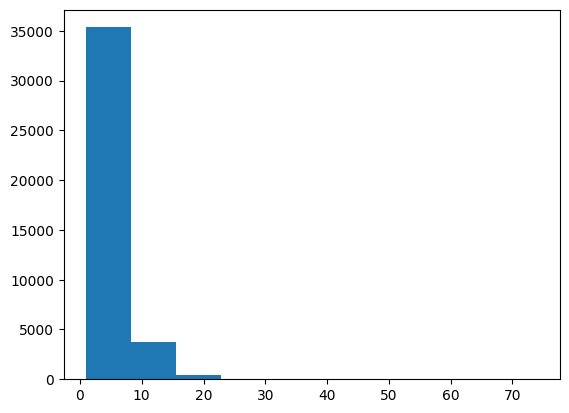

In [ ]:
plt.hist(train_org.ECLO)
plt.show()

In [ ]:
# 부상자수 1명
len(train_org[train_org.ECLO==1])

2578

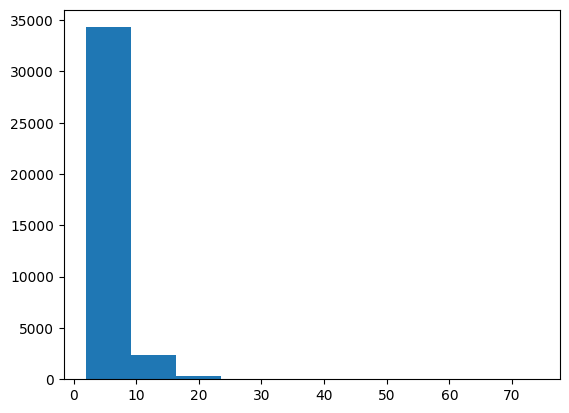

In [ ]:
plt.hist(train_org[train_org.ECLO>1].ECLO)
plt.show()

In [ ]:
len(train_org[train_org.ECLO>6].ECLO)

5678

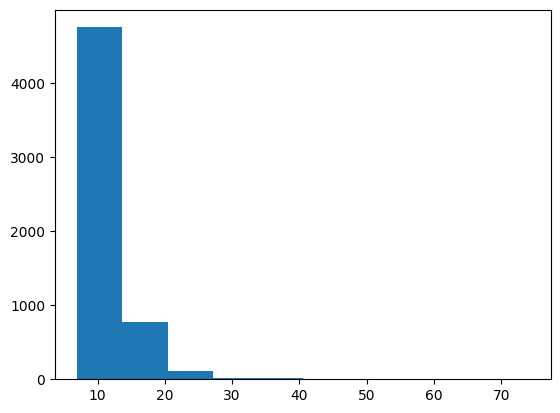

In [ ]:
plt.hist(train_org[train_org.ECLO>6].ECLO)
plt.show()

In [ ]:
train_org.ECLO.sort_values().tail(30)

12159    30
23397    30
4975     31
24738    31
17985    31
39049    31
30366    32
17239    32
10969    32
6426     33
22046    33
26301    34
8300     34
35826    34
8561     35
16659    35
6333     36
16585    37
18151    37
9744     37
34970    39
354      40
29350    45
5358     47
30002    52
10834    56
12632    57
10155    65
37536    66
32591    74
Name: ECLO, dtype: int64

In [ ]:
train_org[train_org.ECLO == 52]

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
30002,ACCIDENT_30002,2021-03-22 15,월요일,맑음,대구광역시 서구 상리동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,부상신고,승용,남,37세,사망,1,4,7,1,52


In [ ]:
len(train_org[train_org.사망자수>0])

300

In [ ]:
len(train_org[train_org.사망자수==1])

292

In [ ]:
len(train_org[train_org.사망자수==2])

8

In [ ]:
len(train_org[train_org.중상자수>0])

9473

In [ ]:
train_org[train_org.중상자수>0].중상자수.describe()

count    9473.000000
mean        1.097013
std         0.364991
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         6.000000
Name: 중상자수, dtype: float64

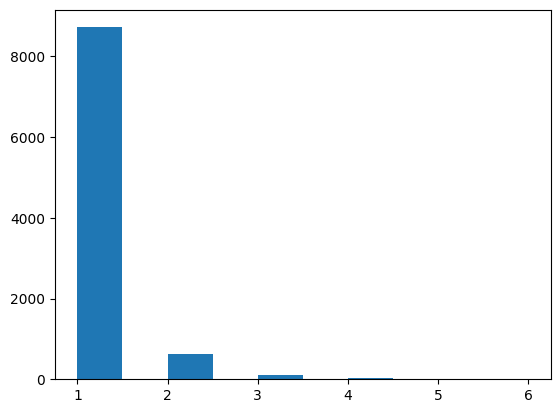

In [ ]:
plt.hist(train_org[train_org.중상자수>0].중상자수)
plt.show()

In [ ]:
train_org[train_org.경상자수>0].경상자수.describe()

count    29325.000000
mean         1.445354
std          0.887047
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         22.000000
Name: 경상자수, dtype: float64

In [ ]:
len(train_org[train_org.경상자수>1])

8412

In [ ]:
len(train_org[train_org.경상자수>2])

2852

In [ ]:
len(train_org[train_org.경상자수>10])

8

In [ ]:
train_org[train_org.경상자수>15]

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
32591,ACCIDENT_32591,2021-06-04 14,금요일,맑음,대구광역시 서구 비산동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승합,남,48세,상해없음,0,4,18,0,74
37536,ACCIDENT_37536,2021-11-01 09,월요일,맑음,대구광역시 북구 노곡동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,22세,경상,0,0,22,0,66


In [ ]:
train_org[train_org.부상자수>0].부상자수.describe()

count    4441.000000
mean        1.131502
std         0.502517
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        10.000000
Name: 부상자수, dtype: float64

In [ ]:
# 평균적으로 차대차 사고가 피해가 가장 심함.
train_org.groupby('사고유형')['ECLO'].mean()

사고유형
차대사람    3.817650
차대차     4.944597
차량단독    4.006054
Name: ECLO, dtype: float64

In [ ]:
# 인명피해가 평균적으로 가장 심한 요일 : 일
# 인명피해가 평균적으로 가장 적은 요일 : 목

# -> 요일 변수 대신 수치형 변수로 쓰면 어떨까
train_org.groupby('요일')['ECLO'].mean().sort_values()

요일
목요일    4.560688
금요일    4.600906
수요일    4.627408
화요일    4.627926
월요일    4.698049
토요일    4.920811
일요일    5.210258
Name: ECLO, dtype: float64

In [ ]:
# 차대차 사고가 가장 많음
train_org.groupby('사고유형')['ECLO'].count()

사고유형
차대사람     6833
차대차     31785
차량단독      991
Name: ECLO, dtype: int64

In [ ]:
# 가장 사고가 많은 요일 : 금
# 가장 사고가 적은 요일 : 일
train_org.groupby('요일')['ECLO'].count().sort_values()

요일
일요일    4114
토요일    5670
목요일    5759
월요일    5895
수요일    5969
화요일    6023
금요일    6179
Name: ECLO, dtype: int64

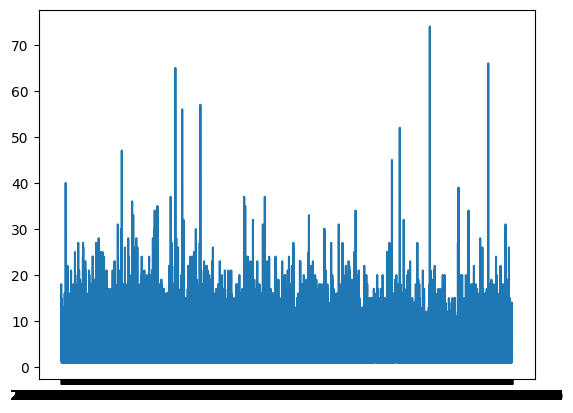

In [ ]:
plt.plot(train_org.사고일시, train_org.ECLO)

In [ ]:
# 결측치 확인
train_org.isnull().sum()

ID               0
사고일시             0
요일               0
기상상태             0
시군구              0
도로형태             0
노면상태             0
사고유형             0
사고유형 - 세부분류      0
법규위반             0
가해운전자 차종         0
가해운전자 성별         0
가해운전자 연령         0
가해운전자 상해정도       0
피해운전자 차종       991
피해운전자 성별       991
피해운전자 연령       991
피해운전자 상해정도     991
사망자수             0
중상자수             0
경상자수             0
부상자수             0
ECLO             0
dtype: int64

In [ ]:
train_null = train_org[train_org['피해운전자 차종'].isnull()]
train_null.head()

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
14,ACCIDENT_00014,2019-01-01 19,화요일,맑음,대구광역시 수성구 황금동,단일로 - 교량,건조,차량단독,공작물충돌,안전운전불이행,...,중상,NaN,NaN,NaN,NaN,0,1,1,0,8
53,ACCIDENT_00053,2019-01-02 23,수요일,맑음,대구광역시 북구 서변동,교차로 - 교차로부근,건조,차량단독,공작물충돌,안전운전불이행,...,경상,NaN,NaN,NaN,NaN,0,0,1,0,3
100,ACCIDENT_00100,2019-01-04 12,금요일,맑음,대구광역시 동구 도학동,단일로 - 기타,건조,차량단독,공작물충돌,안전운전불이행,...,경상,NaN,NaN,NaN,NaN,0,0,1,0,3
118,ACCIDENT_00118,2019-01-04 20,금요일,맑음,대구광역시 남구 대명동,교차로 - 교차로부근,건조,차량단독,기타,기타,...,상해없음,NaN,NaN,NaN,NaN,0,0,1,0,3
141,ACCIDENT_00141,2019-01-05 16,토요일,맑음,대구광역시 달성군 가창면,교차로 - 교차로안,건조,차량단독,기타,안전운전불이행,...,상해없음,NaN,NaN,NaN,NaN,0,2,0,0,10


## Test data EDA

In [ ]:
test_org = pd.read_csv('drive/MyDrive/ai4ml/open/test.csv')

In [ ]:
test_org.head()

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
0,ACCIDENT_39609,2022-01-01 01,토요일,맑음,대구광역시 수성구 상동,교차로 - 교차로안,건조,차대사람
1,ACCIDENT_39610,2022-01-01 01,토요일,맑음,대구광역시 수성구 지산동,단일로 - 기타,건조,차대사람
2,ACCIDENT_39611,2022-01-01 04,토요일,맑음,대구광역시 수성구 수성동2가,교차로 - 교차로안,건조,차대차
3,ACCIDENT_39612,2022-01-01 04,토요일,맑음,대구광역시 수성구 신매동,단일로 - 기타,건조,차대차
4,ACCIDENT_39613,2022-01-01 06,토요일,맑음,대구광역시 달서구 감삼동,교차로 - 교차로안,건조,차대차


In [ ]:
test_org.columns

Index(['ID', '사고일시', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형'], dtype='object')

In [ ]:
test_org.shape

(10963, 8)

In [ ]:
test_org.isnull().sum()

ID      0
사고일시    0
요일      0
기상상태    0
시군구     0
도로형태    0
노면상태    0
사고유형    0
dtype: int64